In [6]:
import pandas as pd

In [7]:
df=pd.read_csv('data.csv')

In [8]:
df.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,1,1035000,2,2.5,3067,1,0,156,79.0,1900,30.0,-37.8079,144.9934,3,4019
1,3,1,1465000,4,2.5,3067,2,0,134,150.0,1900,30.0,-37.8093,144.9944,3,4019
2,4,1,1600000,5,2.5,3067,1,2,120,142.0,2014,30.0,-37.8072,144.9941,3,4019
3,3,1,1876000,2,2.5,3067,2,0,245,210.0,1910,30.0,-37.8024,144.9993,3,4019
4,2,1,1636000,2,2.5,3067,1,2,256,107.0,1890,30.0,-37.8060,144.9954,3,4019


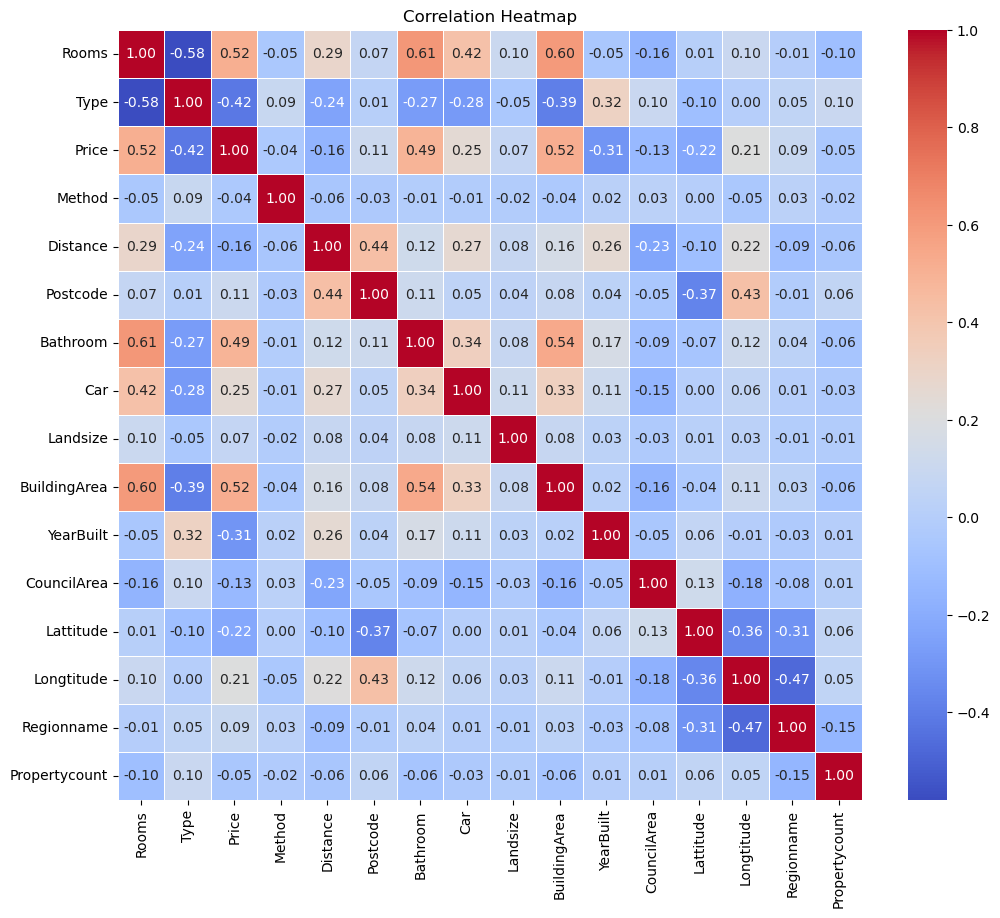

C:\Users\sachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


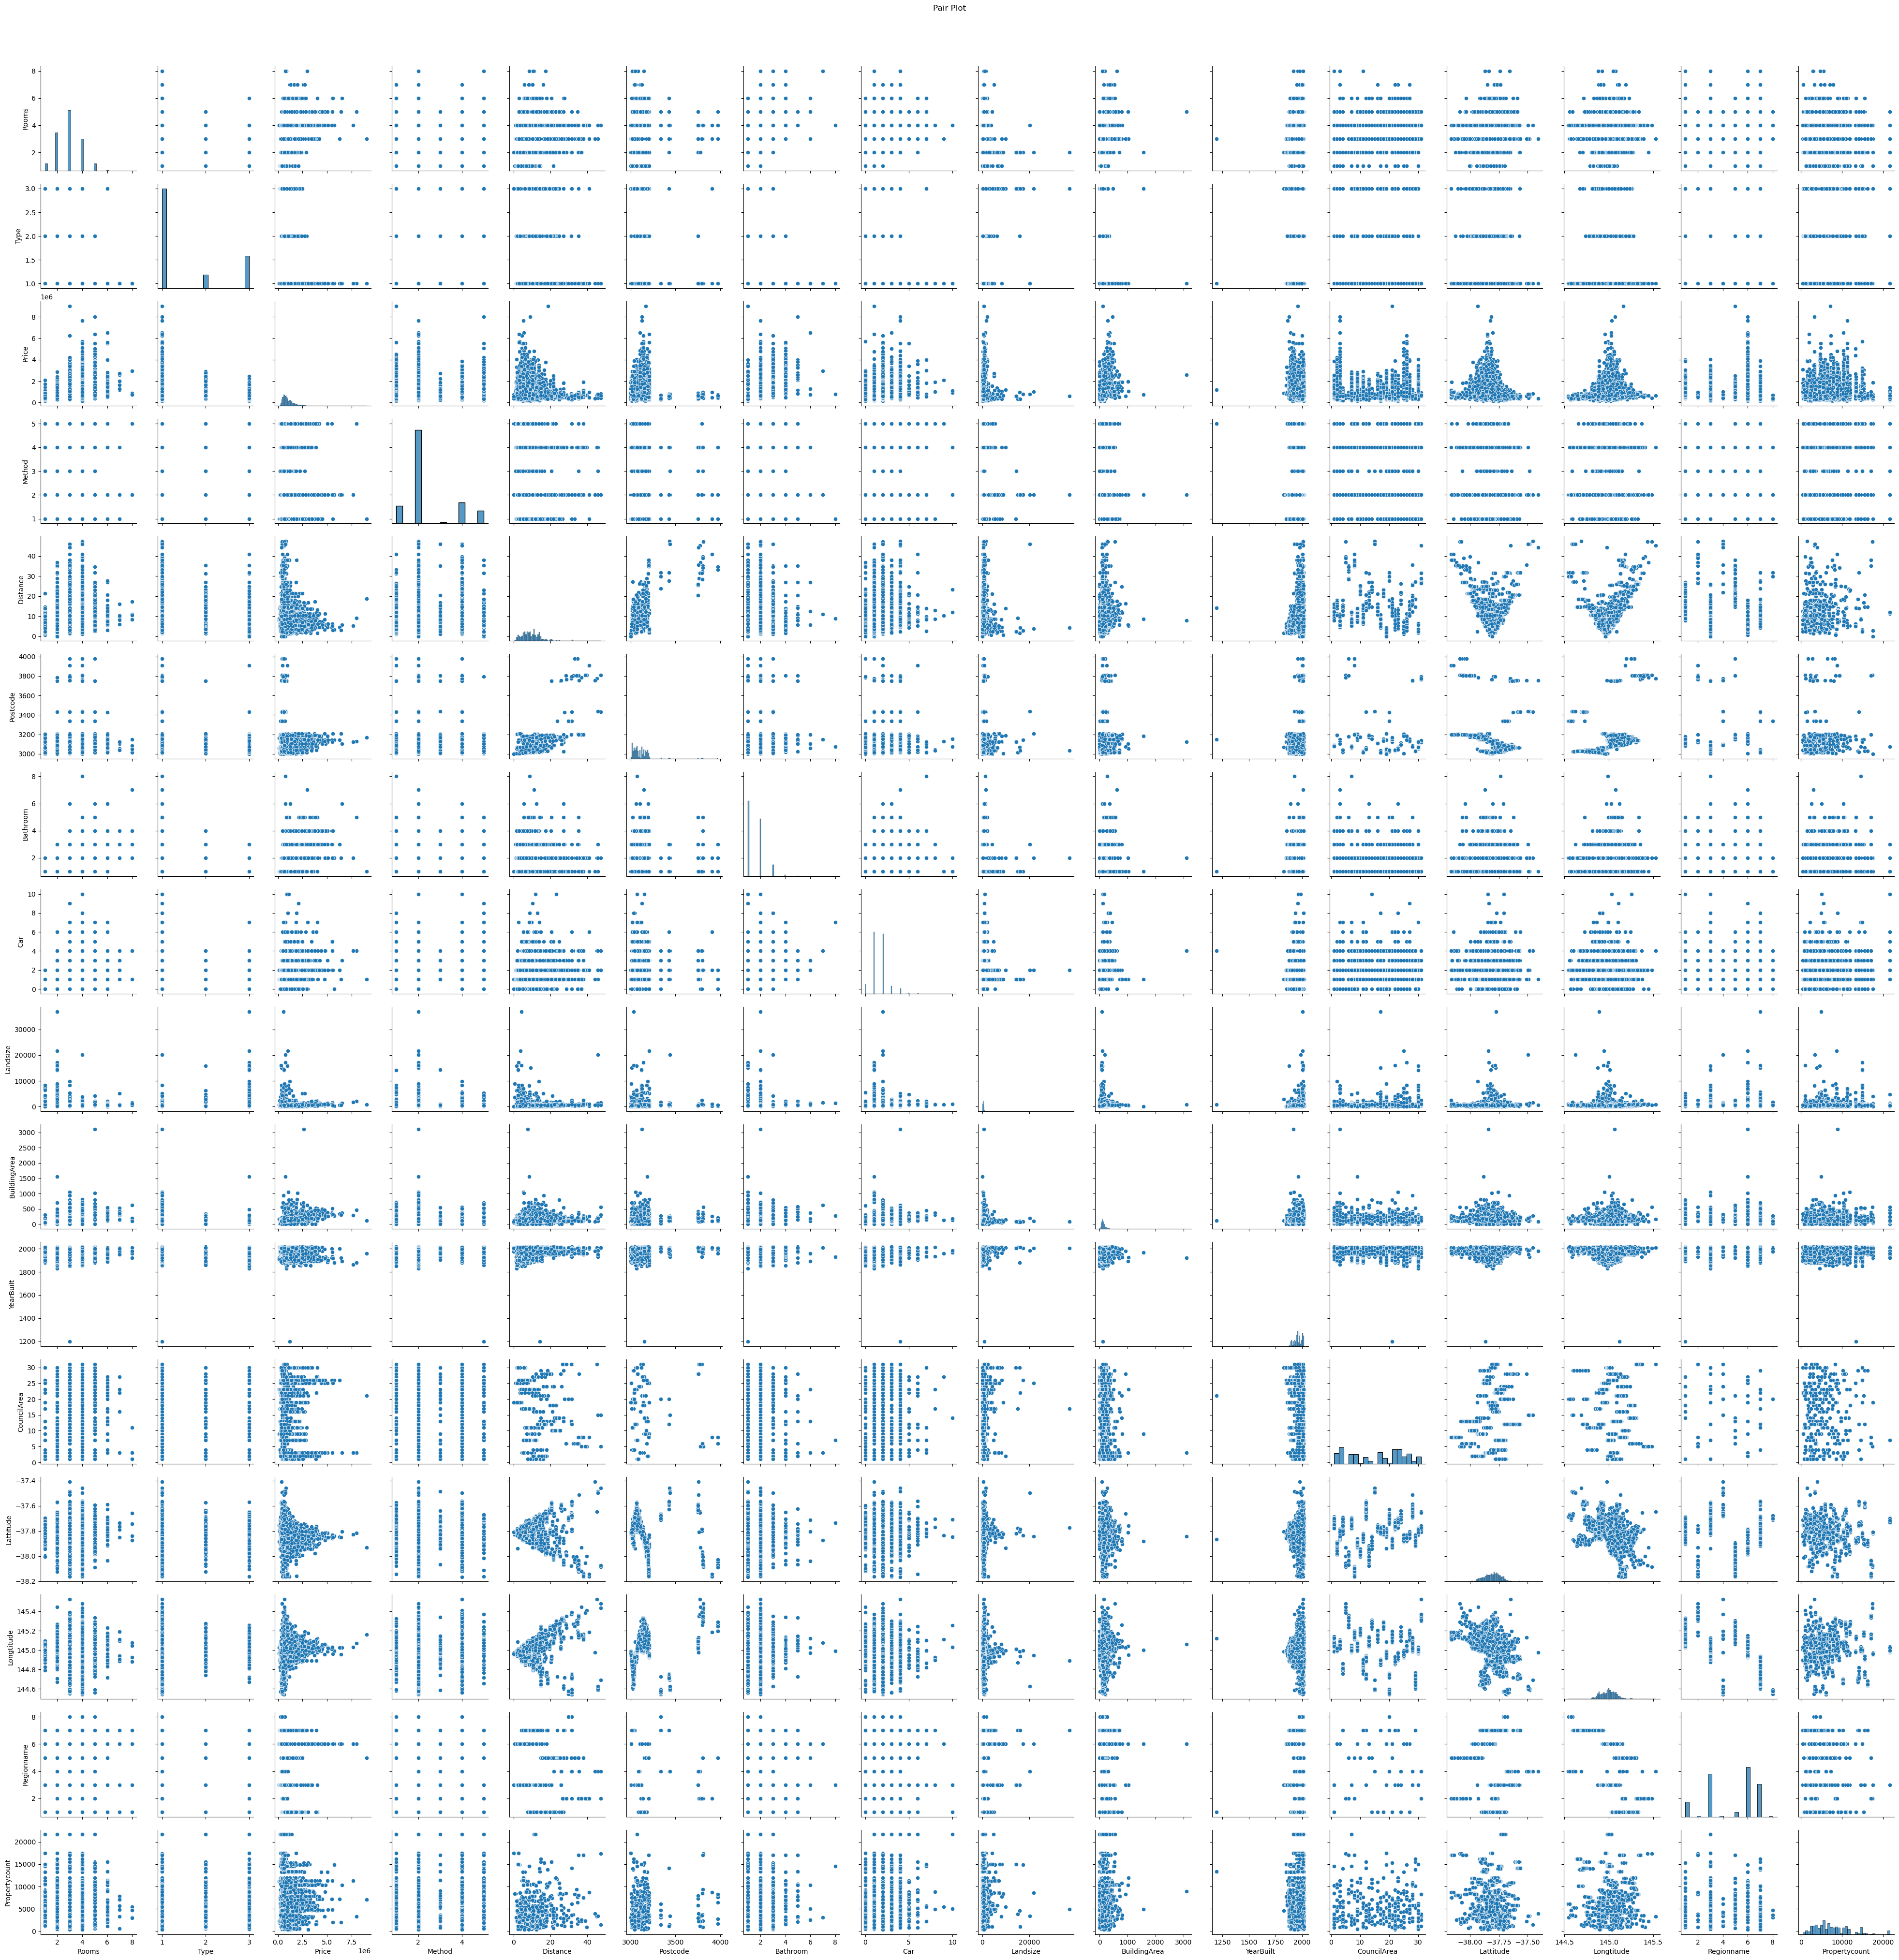

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# If 'df' is not defined, make sure to define it before this block

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot', y=1.02)
plt.show()


In [10]:
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                  Rooms      Type     Price    Method  Distance  Postcode  \
Rooms          1.000000 -0.579983  0.517718 -0.048423  0.289763  0.068674   
Type          -0.579983  1.000000 -0.419183  0.088179 -0.240904  0.008063   
Price          0.517718 -0.419183  1.000000 -0.041462 -0.164975  0.109343   
Method        -0.048423  0.088179 -0.041462  1.000000 -0.058832 -0.031344   
Distance       0.289763 -0.240904 -0.164975 -0.058832  1.000000  0.438274   
Postcode       0.068674  0.008063  0.109343 -0.031344  0.438274  1.000000   
Bathroom       0.613285 -0.273788  0.492481 -0.006614  0.124044  0.112776   
Car            0.420493 -0.281780  0.250916 -0.014382  0.265142  0.049226   
Landsize       0.099031 -0.045246  0.073536 -0.015780  0.082449  0.039998   
BuildingArea   0.603150 -0.388990  0.520492 -0.040639  0.155148  0.081791   
YearBuilt     -0.049272  0.320428 -0.307343  0.024371  0.258462  0.036819   
CouncilArea   -0.161131  0.095130 -0.130870  0.028821 -0.229657 -0.052010   

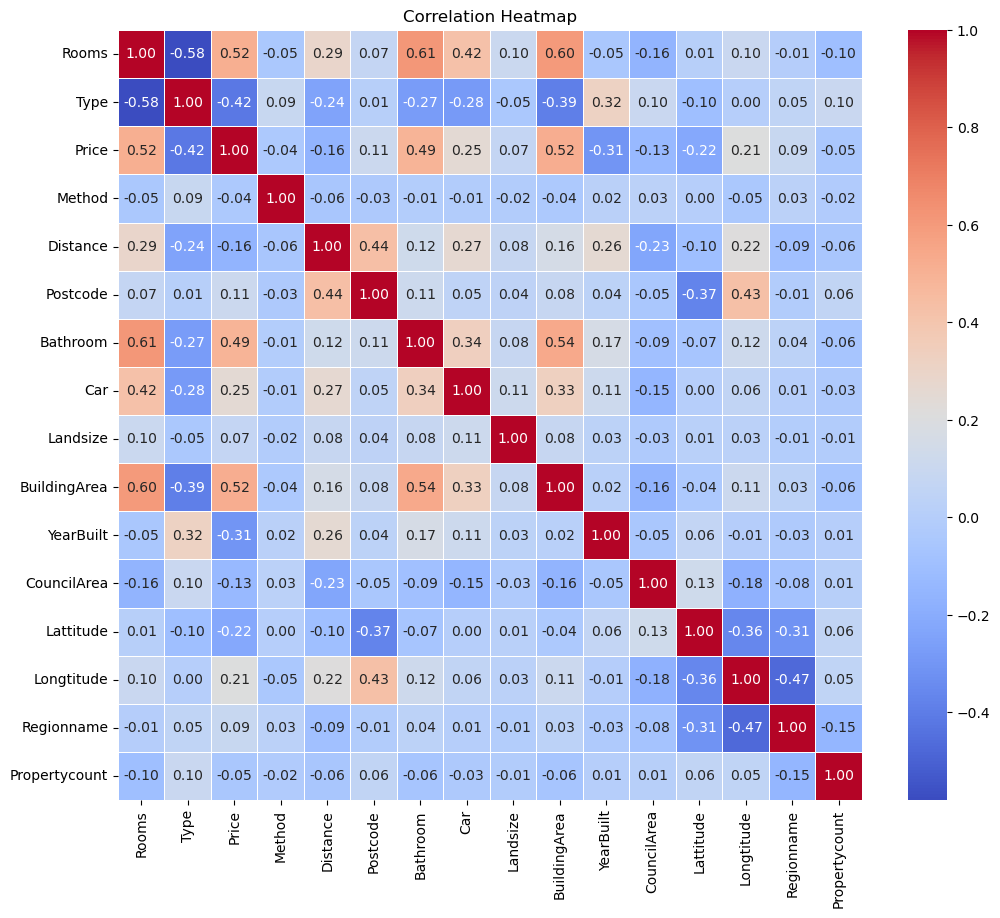

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [12]:
# Find the maximum correlation
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

# Display the maximum correlation and corresponding variable names
max_corr_pair = max_corr[max_corr != 1].idxmax()
max_corr_value = max_corr[max_corr != 1].max()

print(f"Maximum Correlation: {max_corr_value}\nVariables: {max_corr_pair}")


Maximum Correlation: 0.6132846698844148
Variables: ('Bathroom', 'Rooms')


In [13]:
# Find the minimum correlation
min_corr = correlation_matrix.unstack().sort_values().drop_duplicates()

# Display the minimum correlation and corresponding variable names
min_corr_pair = min_corr[min_corr != 1].idxmin()
min_corr_value = min_corr[min_corr != 1].min()

print(f"Minimum Correlation: {min_corr_value}\nVariables: {min_corr_pair}")


Minimum Correlation: -0.5799829931803092
Variables: ('Rooms', 'Type')


In [14]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [15]:
X = df.drop('Price', axis=1)  # Assuming 'Price' is the column name for the target variable
y = df['Price']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)
model = xgb.XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
y_pred = model.predict(X_test)


In [19]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 68056486424.51941


In [20]:
# Assuming model is already trained
new_data = pd.DataFrame({
    'Rooms': [2],
    'Type': [1],
    'Method': [2],
    'Distance': [2.5],
    'Postcode': [3067],
    'Bathroom': [1],
    'Car': [0],
    'Landsize': [156],
    'BuildingArea': [80],
    'YearBuilt': [1900],
    'CouncilArea': [30],
    'Lattitude': [+55],
    'Longtitude': [144.9934],
    'Regionname': [3],
    'Propertycount': [4019]
})

predicted_price = model.predict(new_data)
print(f'Predicted house Price: {predicted_price[0]}')


Predicted house Price: 971518.6875


# limtation

In [21]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming df is your DataFrame
X = df.drop('Price', axis=1)
y = df['Price']

# Create an XGBoost model with initial hyperparameters
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform cross-validation
cv_scores_train = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
average_cv_mse_train = -np.mean(cv_scores_train)

print(f'Average Cross-Validation MSE on Training Set: {average_cv_mse_train}')


Average Cross-Validation MSE on Training Set: 99259636005.79211


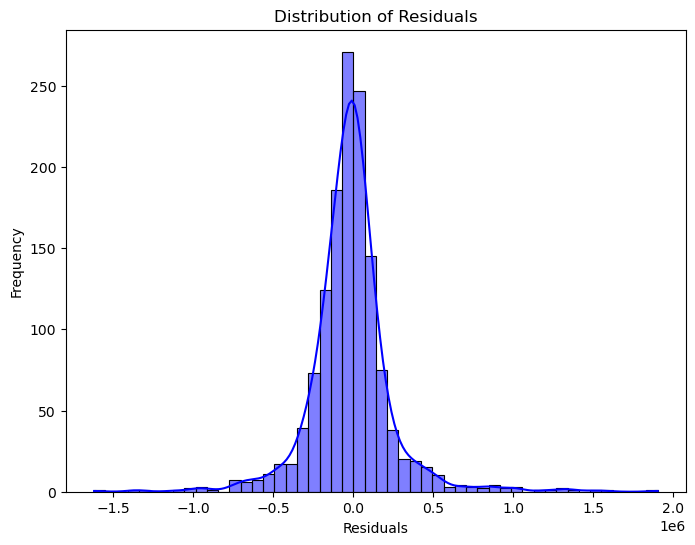

In [22]:

# Calculate residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=50)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [23]:
xgb.plot_importance(model)
plt.show()


NotFittedError: need to call fit or load_model beforehand

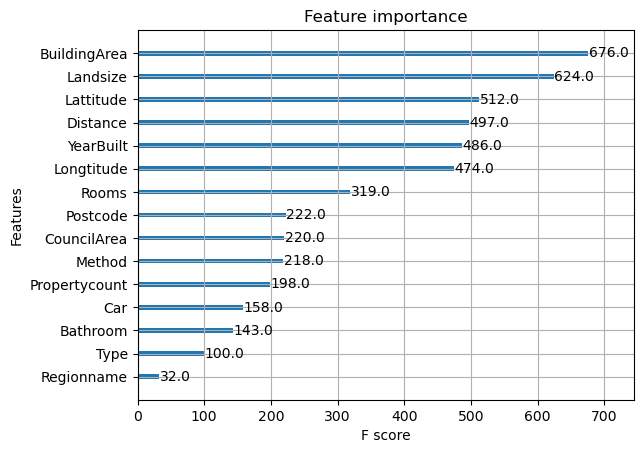

In [24]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Fit the model on the training data
model.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(model)
plt.show()
